# Exploratory Data Analysis

## 1. Load the data

In [15]:
import string
import pandas as pd
month = "11-Nov-"

table_df = pd.read_csv('data/' + month + 'Tweets.csv')
table_df.head()

,Unnamed: 0,date,likes,retweets,screen_name,tweet,tweet_id
0,0.0,2020-11-01 23:59:59,0.0,0.0,999naotel,ほんとうにお疲れ様でした。\nせっかく勝つ!!🏆👑🎌\nと信じたのに残念(´；ω；｀)\nで...,1.3230521987003515e+18
1,1.0,2020-11-01 23:59:53,1.0,0.0,Karen96562159,@DavidCornDC My heart aches for all of us eho ...,1.3230521705984778e+18
2,2.0,2020-11-01 23:59:44,4.0,1.0,parisavayoubi,the 1 yr anniversary of Najah’s disappearance ...,1.3230521339066696e+18
3,3.0,2020-11-01 23:59:56,0.0,0.0,covid19jayapura,Giat aktivitas rutin Posko Induk Penanganan Co...,1.3230521849262653e+18
4,4.0,2020-11-01 23:59:54,0.0,0.0,yaUle17,Half of Slovakia's population tested for coron...,1.3230521750697165e+18


In [16]:
# Loop through the whole list and remove the coloumn headings,
# since they repeat after every 100 entries

for i in range(len(table_df)):
    if table_df.loc[i, "tweet"] == "tweet":
        #print(i)
        table_df=table_df.drop(index=i)

In [17]:
print(table_df.head())


   Unnamed: 0                 date likes retweets      screen_name  \
0         0.0  2020-11-01 23:59:59   0.0      0.0        999naotel   
1         1.0  2020-11-01 23:59:53   1.0      0.0    Karen96562159   
2         2.0  2020-11-01 23:59:44   4.0      1.0    parisavayoubi   
3         3.0  2020-11-01 23:59:56   0.0      0.0  covid19jayapura   
4         4.0  2020-11-01 23:59:54   0.0      0.0          yaUle17   

                                               tweet                tweet_id  
0  ほんとうにお疲れ様でした。\nせっかく勝つ!!🏆👑🎌\nと信じたのに残念(´；ω；｀)\nで...  1.3230521987003515e+18  
1  @DavidCornDC My heart aches for all of us eho ...  1.3230521705984778e+18  
2  the 1 yr anniversary of Najah’s disappearance ...  1.3230521339066696e+18  
3  Giat aktivitas rutin Posko Induk Penanganan Co...  1.3230521849262653e+18  
4  Half of Slovakia's population tested for coron...  1.3230521750697165e+18  


## 2. Removing '@' mentions
@ mentions in the tweets aren't really useful.
We can remove them from all the tweets if any tweet
mentions another user.


In [18]:
# Get the row data from the tuple returned by iterarrows()
next(table_df.iterrows())[1]

Unnamed: 0                                                     0
date                                         2020-11-01 23:59:59
likes                                                        0.0
retweets                                                     0.0
screen_name                                            999naotel
tweet          ほんとうにお疲れ様でした。\nせっかく勝つ!!🏆👑🎌\nと信じたのに残念(´；ω；｀)\nで...
tweet_id                                  1.3230521987003515e+18
Name: 0, dtype: object

In [19]:
# Check for presence of @ character
table_df["tweet"].str.contains("@")

0        False
1         True
2        False
3        False
4        False
         ...  
28981    False
28982     True
28983    False
28984     True
28985     True
Name: tweet, Length: 28697, dtype: bool

In [20]:
# Small example showing how to remove @ mentions
import re
text="@archity how are you?"
newText=re.sub('@.*? ', '', text)
print(newText)

how are you?


In [21]:
df_clean=table_df

# Function for removing @ mentions and hyperlinks
def remove_mentions(text):
    newtext = re.sub('@.*? ', '', text)
    newtext = re.sub(r'https?:\/\/.*[\r\n]*', '', newtext)
    return newtext

df_clean['tweet']=table_df.tweet.apply(lambda x: remove_mentions(x))
print(type(df_clean.tweet))

<class 'pandas.core.series.Series'>


In [22]:
print(df_clean.head(40)["tweet"])

0     ほんとうにお疲れ様でした。\nせっかく勝つ!!🏆👑🎌\nと信じたのに残念(´；ω；｀)\nで...
1     My heart aches for all of us eho have lost fam...
2     the 1 yr anniversary of Najah’s disappearance ...
3     Giat aktivitas rutin Posko Induk Penanganan Co...
4     Half of Slovakia's population tested for coron...
5     ASIAN Nikkei futures +93pts, HK ADR’s  +217pts...
6     Lockdown inicia dia 17/11/2020, conforme a com...
7     Hey Chris Wallace at &amp; ~ You both said Tru...
8     #AHORA Coronavirus en Corrientes: Confirman tr...
9     William is irresponsible and continued to act ...
10    I had a teacher last year who I saw as a mom f...
11    So 4) Lets not pretend it is normal for them. ...
12    How much for memberships? Covid specials price...
13    same here - even if i did (didn't??) do my gcs...
14    Our club has been totally Covid compliant incl...
15    Cierre las playas y fuertes multas y verá que ...
16    We were planning to get married 9 months after...
17    Duchess Katherine seems to have suffered d

In [23]:
import string
# Remove punctuation marks from every tweet
# puncChars = string.punctuation
puncChars = '''!()-[]{};:'"\,<>./?@#$%^&*_~’‘´`~|+'''
print(type(puncChars))

print(type(df_clean.loc[:, 'tweet']))
  
df_clean.loc[:, 'tweet'] = df_clean.loc[:, 'tweet'].str.translate(str.maketrans('', '', puncChars))
# Get the data type of each coloumn
#print(df_clean.dtypes)

<class 'str'>
<class 'pandas.core.series.Series'>


In [24]:
print(df_clean.head(40)["tweet"])

0     ほんとうにお疲れ様でした。\nせっかく勝つ🏆👑🎌\nと信じたのに残念；ω；｀\nでも知事は続...
1     My heart aches for all of us eho have lost fam...
2     the 1 yr anniversary of Najahs disappearance w...
3     Giat aktivitas rutin Posko Induk Penanganan Co...
4     Half of Slovakias population tested for corona...
5     ASIAN Nikkei futures 93pts HK ADRs  217pts BUT...
6     Lockdown inicia dia 17112020 conforme a comuni...
7     Hey Chris Wallace at amp  You both said Trump ...
8     AHORA Coronavirus en Corrientes Confirman tres...
9     William is irresponsible and continued to act ...
10    I had a teacher last year who I saw as a mom f...
11    So 4 Lets not pretend it is normal for them It...
12    How much for memberships Covid specials price ...
13    same here  even if i did didnt do my gcses las...
14    Our club has been totally Covid compliant incl...
15    Cierre las playas y fuertes multas y verá que ...
16    We were planning to get married 9 months after...
17    Duchess Katherine seems to have suffered d

In [25]:
# Go through each tweet and put individual word into a list
from collections import Counter

print("Coloumn tweet type: ", type(df_clean.tweet))

word_list = []

for tweet in df_clean.tweet:
    word_list+=(tweet.split())


#word_list[:100]
print(Counter(word_list).most_common(20))
print(type(word_list))
print(len(word_list), "total words")

Coloumn tweet type:  <class 'pandas.core.series.Series'>
[('the', 16067), ('to', 13174), ('a', 11459), ('and', 9206), ('of', 8910), ('covid', 7169), ('in', 7130), ('de', 6777), ('is', 6703), ('Covid', 5562), ('COVID19', 5549), ('for', 5447), ('I', 5259), ('COVID', 5020), ('you', 4159), ('that', 3997), ('are', 3655), ('on', 3443), ('it', 3379), ('que', 3346)]
<class 'list'>
691102 total words


Some remarks-

* We can see that there are several article words (a, an , the), prepositions (in, of), as well as non-English prepositions (en, de) So we need to remove such non-essential words.
* 'coronavirus' and 'coronavirus.' (with a dot) are taken as two seperate words. So we may need to remove all such punctuation marks.
* 'Coronavirus' and 'coronavirus' are also treaded as two different words, so we need to take care of upper/lower case letters. 

In [26]:
# Convert all the letters of words to lowercase
word_list_lower = list(map(lambda x:x.lower(), word_list))

# Get the count values of all the words
words_counter = Counter(word_list_lower).most_common()

# Convert the Counter list to a Pandas dataframe
words_counter_df = pd.DataFrame.from_records(list(dict(words_counter).items()), columns=['word', 'count'])

print(len(word_list_lower), "total words")
print(len(Counter(word_list_lower)), "unique words")


with open('all-words.txt', 'w', encoding="utf-8") as filehandle:
    for listitem in word_list_lower:
        filehandle.write('%s\n' % listitem)
words_counter_df[:20]


691102 total words
66688 unique words


,word,count
0,the,18106
1,covid,17795
2,to,13518
3,a,12225
4,and,9936
5,of,9109
6,covid19,8805
7,in,7588
8,is,7088
9,de,6972


In [27]:
import itertools

# Remove English, French and Spanish Parts of Speech (PoS) words
english_pos = ["a", "an", "the", "in", "on", "of", "for", "to", "by", "at", "till", "until", "i", "as", "it", "he", "she", "you", "via", "and"]
french_pos = ["en", "de", "le", "la", "les", "des", "à", "un", "une", "se"]
spanish_pos = ["el", "por", "que"]

for word1, word2, word3 in itertools.zip_longest(english_pos, french_pos, spanish_pos):
    words_counter_df.drop(words_counter_df[words_counter_df.word == word1].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word2].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word3].index, inplace=True)
    #print(word1, word2, word3)

words_counter_df.reset_index()
words_counter_df[:20]

* We see that there are too many different types of PoS words that are coming across. It's better to utilize Python's NLTK library for further refinement.

In [28]:
df_clean.tweet.loc[1]

'My heart aches for all of us eho have lost family and friends to Covid  trumps got to go  VOTE BIDEN HARRIS 🌊'

In [29]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

words_counter_df = words_counter_df.reset_index(drop=True)

words = words_counter_df['word']
word_list = words.values.tolist()
print(word_list[:10])

# Tag all the unique words with POS tagging
tagged_word = nltk.pos_tag(word_list)


tagged_word[:20]

Let's try to download NLTK's stopwords database for English, French, and Spanish


In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
stopwords_english = stopwords.words('english') 
stopwords_french = stopwords.words('french')
stopwords_spanish = stopwords.words('spanish')

print('Stop words\n')
print(stopwords_english)
print(stopwords_french)
print(stopwords_spanish)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [32]:
for word1, word2, word3, punc in itertools.zip_longest(stopwords_english, stopwords_french, stopwords_spanish, string.punctuation):
    words_counter_df.drop(words_counter_df[words_counter_df.word == word1].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word2].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == word3].index, inplace=True)
    words_counter_df.drop(words_counter_df[words_counter_df.word == punc].index, inplace=True)

#words_counter_df.reset_index()

In [33]:
# Now we remove words like covid, coronavirus
covidWords = ["covid", "coronavirus", "covid-19", "covid19"]
for covword in covidWords:
    words_counter_df.drop(words_counter_df[words_counter_df.word == covword].index, inplace=True)

# Remove "&amp;". It occurs several times ('&' and ';' have already been removed)
words_counter_df.drop(words_counter_df[words_counter_df.word == "amp"].index, inplace=True)

words_counter_df = words_counter_df.reset_index(drop=True)
words_counter_df[:20]

print(words_counter_df[:20])
print("Total unique words: ", words_counter_df.size)

       word  count
0    people   2450
1     cases   1776
2     trump   1744
3       get   1573
4      like   1352
5      dont   1316
6        us   1276
7    deaths   1246
8       new   1235
9        im   1156
10      one   1029
11    would    959
12     know    882
13    still    820
14  vaccine    813
15     time    801
16       go    765
17    going    748
18     many    739
19    virus    739
Total unique words:  132482


## Word Cloud

In [34]:
# Rename the column 'count' to 'freq'
words_counter_df.columns = ['word', 'freq']

# Convert pd dataframe to dictionary for input for wordcould
wordcount_dict = dict(zip(words_counter_df.word, words_counter_df.freq))
# Print first 10 items of this dict
print(list(wordcount_dict.items())[0:10])

[('people', 2450), ('cases', 1776), ('trump', 1744), ('get', 1573), ('like', 1352), ('dont', 1316), ('us', 1276), ('deaths', 1246), ('new', 1235), ('im', 1156)]


In [35]:
#print(words_counter_df['freq'].where(words_counter_df['word']=='&amp;'))
#words_counter_df.lookup(words_counter_df.word, words_counter_df.freq)

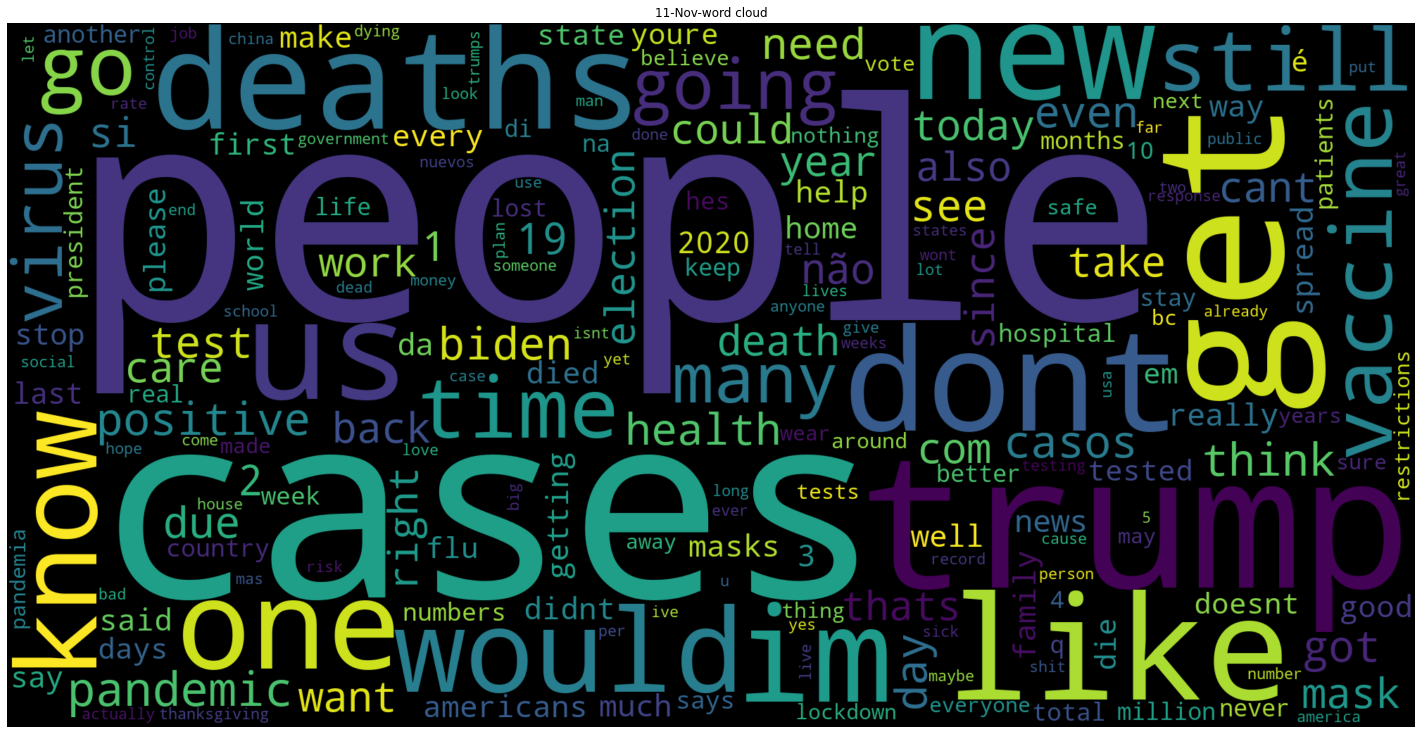

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=2000, height=1000).generate_from_frequencies(wordcount_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation='bilinear')
plt.title(month + 'word cloud')
plt.axis('off')
plt.tight_layout(pad=0)
#plt.show()
wc.to_file('img/wordcloud_' + month + '.png')
#plt.savefig("img/wordcloud_jan.png", format="png")

        
